In [12]:
import os
from PIL import Image

In [14]:
os.remove('dataset/.DS_Store')

In [19]:
for image_direc in os.listdir('dataset/'):
    for filename in os.listdir('dataset/'+image_direc):
        img_file = 'dataset/'+image_direc+ "/" + filename
        try :
            Image.open(img_file)
        except :
            print('EXCEPT '+img_file)
            os.remove('dataset/'+image_direc+ "/" + filename)

EXCEPT dataset/disposable_coffee_cup/.DS_Store
EXCEPT dataset/large_water_bottles/.DS_Store
EXCEPT dataset/baby_bottles/.DS_Store
EXCEPT dataset/plastic_cd/.DS_Store
EXCEPT dataset/exterior_lighting_fixtures/.DS_Store
EXCEPT dataset/plastic_food_box/.DS_Store
EXCEPT dataset/plastic_cutlery/.DS_Store
EXCEPT dataset/packing_foam/.DS_Store
EXCEPT dataset/eyeglasses/.DS_Store
EXCEPT dataset/eyeglasses/54.Tungsten-Titanium-Imitation-Steel-Ultem-Glasses-Frames-Plastic-Eyeglasses-Frames-Acetate-Prescription-Optical-Frames-5pcs-lot.jpg
EXCEPT dataset/eyeglasses/8.ibboll-Fashion-Square-Optical-Glasses-Frame-with-Clear-Lens-Women-Plastic-Eyeglasses-Frames-Female-Eyewear-Frame.jpg
EXCEPT dataset/medical_storage_containers/.DS_Store


In [20]:
import os
from PIL import Image
from torchvision import models, transforms

In [21]:
def standardize_images(src_dir, dest_dir):
    preprocess = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224)])


    for i in os.listdir(src_dir):
        print(i)
        img = preprocess(Image.open(src_dir+i))
        img = img.convert("RGB")
        img.save(dest_dir+i, "JPEG")

In [24]:
for i in os.listdir('dataset/'):
    os.makedirs('PlasticNet/'+i)

In [26]:
for i in os.listdir('dataset/'):
    standardize_images('dataset/'+i+'/','PlasticNet/'+i+'/')

65.foam-cups-101414.png
24.58019847-empty-polystyrene-foam-takeaway-coffee-cup.jpg
25.Double+Walled+Paper+Cups_4ebd6ee3-ce86-48ec-bfc6-369fd674ac31-prv.jpg
75.polystyrene.jpg
104.cup-glass-cappuccino-polystyrene-250-cc-customized.jpg
34.CoffeeShop.jpg
9.31L0Xu12znL._SL500_AC_SS350_.jpg
15.prototype-1.jpg
23.foam-polystyrene-drinking-cup-disposable-take-way-tea-coffee-cup-[2]-1555-p.jpg
18.polystyrene-cup.jpg
97.Polyform_Polystyrene_cup.jpg
46.Screen+Shot+2018-11-11+at+9.32.29+PM.png
9.foam-cups-101414.png
19.500_F_192049278_lghsI0BTVNrlaj6Wdkyz23FtUP148M5j.jpg
29.stock-vector-red-blank-disposable-paper-cup-with-lid-container-for-hot-drink-coffee-java-tea-cappuccino-506692045.jpg
101.styrofoam-cups-sizes-personalized-party-cocktail-foam-cups-standard-polystyrene-cup-size-standard-styrofoam-coffee-cup-size.jpg
20.1000-large-10oz-300ml-white-polystyrene-foam-cups-lids-hot-drinks-thermal-5299-1-p.jpg
10.medium_plus_68599-852-64185-Disposable-Cups-Disposable-White-Polystyrene-Coffee-Cups-Pa

/home/ec2-user/anaconda3/envs/fastai-py37/lib/python3.7/site-packages/PIL/Image.py:965: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


34.61pugEmh8dL._SX466_.jpg
30.120321-mcdonalds-w.jpg
95.609664-a.jpg
11.Double+Walled+Paper+Cups_4ebd6ee3-ce86-48ec-bfc6-369fd674ac31-prv.jpg
12.s-l300.jpg
51.$_86.JPG
74.2.jpg
1.polystyrene-cup-photo-researchers-canvas-print.jpg
40.61mqIXneIhL._SX466_.jpg
18.14oz-foam-cup-l.jpg
22.609664.jpg
5.61SA797bp8L._SX425_.jpg
48.th.jpg
7.foam-cups_grande.jpg
5.609664.jpg
60.mcdonald-expanded-polystyrene-coffee-cup.png
115.black-hard-plastic-cups-350-cc-customized.jpg
54.plastic_cups_41d4ada6-74d2-49f6-99fc-4c48f9ba8c08_grande.png
8.950259.jpg
26.medium_plus_68599-852-64185-Disposable-Cups-Disposable-White-Polystyrene-Coffee-Cups-Package-of-25.jpg
53.20-oz-foam-cups-with-lid-ts20j16.jpg
16.foamcup.jpg
43.dunkin_cup.jpeg
17.foam-polystyrene-drinking-cup-disposable-take-way-tea-coffee-cup-1555-p.jpg
61.897098928.jpg
27.Vaporpath-VioraLid-1.jpg
99.styrofoam-cups-pressurized.jpg
59.GettyImages-177158289.jpg
11.Put-Down-that-Styrofoam-Cup-Dangers-of-Polystyrene-696x436.jpg
33.coffee_cups.jpg
28.5ac7

37.lineup_img01.png
61.pvc-schedule-40-pipe-1586-64_1000.jpg
109.how-to-connect-pvc-pipes-for-aquarium-plastic-waterproof-tube-pipe-connect-water-pipe-head-fish-tank-accessories-2-color.jpg
77.BTD96_13.jpg
90.pngbase64ad321a5e3113cc41.png
29.PVC-Insulated-Square-Ducting.jpg
198.500_F_121895842_ZW1mcFfGYBqrdRr0bWLfdZqhCCOF0tKQ.jpg
56.54-2039.jpg
37.upvc-self-fit-pipes-irigation-img.jpg
1.product03.png
126.20mm-Inner-Dia-3-Way-T-Shaped-PVC.jpg
123.b379pa074j0b3793b49if53bfb9b39d30bpc85cj.jpg
13.PVC-Pipe-Fitting-Rainwater-Gutter-PVC-Gutter-Roof-Gutter-Rainwater-System-Gutter-Plastic-Gutter.jpg
53.pvc--1.jpg
37.slide_1.jpg
53.91549bddab16edc928432828cfeaf6be66cfa3a2.jpg
4.1528972925PVC%20Gutter.jpg
50.PVC_DWV2-300x252.jpg
6.PVC-Pipes-Polyvinyl-Chloride.jpg
4.ISO-PVC-drainage-pipe-PVC-sewage-pipe.jpg
82.0001205_upvc-pressure-piping-system_450.jpeg
71.Georg-Fischer-PVC-Ducts.jpg
26.41xaiT93YeL._SX425_.jpg
124.Saneamento_160-018_800x628.png
142.pvc-plastic-plumbing-pipe--715.jpg
13.HTB1bdiFaU

13.imgbin-plastic-pipework-separative-sewer-sewerage-polyvinyl-chloride-others-fWfB8pgfXJKz7H8ty1QL79QL5.jpg
65.7-Tips-For-Choosing-Pvc-Pipes-For-Sewerage4.jpg
76.product4.png
58.plumbing-article.jpg
10.TYD1X2NPW6.jpg
63.70253539.jpg
59.kisspng-pipe-ventilation-duct-polyvin-5b11f6ea6f6b12.6979417615279039784564.jpg
78.PVC-Piping-with-Compressed-Air-_1-770x472.jpg
44.1035191779.jpg
85.1c1ba8b95742c41bfedcef89bd5e179c.jpg
194.Plumbing-Pipe-Fitting-Bathroom-Fittings-Names-Names-of-PVC-Pipe-Fittings-for-Pipe-Joint.jpg
32.1*LS5W2KWLaMwOajLuiPZYDQ.jpeg
149.323604337089_1_183_1_00000003.jpg
40.novaflex-9sfpvcw02-duct.jpg
1.ASTM_D-2729_sewer_drain_pipe.jpg
30.PVC-NEW-500x300.jpg
80.pvc-plumbing-pipe-plumbing-flexible-pipe-pvc-plumbing-pipes-and-fittings.jpg
54.kisspng-piping-and-plumbing-fitting-plastic-pipework-polyv-5afc3617d93951.2757019915264783598898.jpg
69.White-Square-PVC-roof-rainwater-gutter-downspout.jpg
192.Polyvinyl-Chloride-Pvc-Pipes-702x336.jpeg
69.pvc-schedule-40-pressure-pipe.j

17.x_3StrandPolyester.jpg
65.71mt-%2B9rG4L._SX425_.jpg
120.ppr14600_800x.png
154.plastic-recycled-rope-500x500.jpg
105.plastic-twine-rope-500x500.jpg
63.a7222d9a-d519-476e-8970-02d4a9beec9e_1.7f41f3a30927e1efabb0499a5f4ad380.jpeg
83.mooring%20rope_8.jpg
59.654703705.jpg
170.white-baler-twine-500x500.jpg
69.mr-chain-chain-50102-64_400_compressed.jpg
171.1391765250mfm69Hdpe_Ropes.jpg
79.e1c4584ccb3e79ea100efd9727c33af5_original.JPG
119.fp02_600x400.jpg
195.s-s-ropes-cables-ram-nagar-coimbatore-submersible-pump-dealers-4eidk.jpg
77.Plastic-Monofilament-Ropes.jpg
97.coil-plastic-rope-white-background-116688821.jpg
38.plastic-rope-blue.jpg
194.plastic-rope.jpg
127.PCORDs.jpg
107.close-up-red-plastic-rope-top-view-white-background-110652838.jpg
110.pl9646078-remark.jpg
22.mmnj.jpg
13.61FTbXJy65L._SX425_.jpg
35.PP-Binder-Plastic-Rope-1-kg-1.jpg
145.Plastic-Ropes.jpg
37.cbe9caa5_1d54e0b5_7be2_4921_b51f_df8508d92869.jpg
66.SE75P-CR0.jpg
113.9af151aa-e8e5-4cc7-91f2-978c2e87682a_1.923b75bc1d10ea5

195.Sexy-gladiator-Sandals-women-clear-pvc-flipflops-high-heels-2018-new-summer-fall-rabbit-fanny-slippers-fetish-shoes-woman-GHv9-gjq0.jpg
174.Qianruiti-Summer-Female-Perspex-Mules-PVC-Peep-Toe-Kitten-Heels-Slip-on-Shoes-Jelly-Clear-Sandals-Transparent-High-Heel-Slippers-HPZR04735-kop0.jpg
183.Macvise-Mens-Croc-Clogs-Shoes-Sandals-Casual-Slipon-New-Summer-Hollowout-Water-Breathableamplight-Slippers-Flipflops-for-Men-EVA-PVC-Solid-odv0.jpg
45.B0908675657.jpg
57.2018-Summer-Shoes-Anti-static-Canvas-Breathable-Shoes-Men-Running-PVC-Casual-Dust-Free-Room-Work.jpg
97.Women-Sandals-PVC-Crystal-Slipper-Ultra-High-Heels-95-CM-Transparent-Waterproof-Cool-Slippers-Fine-With-Steel-Tube-Dancing-Shoe-DILF59722-fsd0.jpg
180.s-l400.jpg
46.outlet-appeal-blackgreen-7-5-upuper-summer-men-flip-flops-male-mixed-color-slippers-men-casual-pvc-eva-shoes-summer-fashion-beach-sandals-size-40-45-4148255686679_2000x.jpg
6.pvc-shoes-250x250.jpg
75.8%20Sandals%20Mens%20shoes%20Dark%20blue%20100%20PVC%20-%20Polyvi

102.B1165048382.jpg
71.11309069KH%20Mens%20DIESEL%20Sneakers%2090%20Bovine%20leather%2010%20PVC%20Polyvinyl%20chloride%20Spring%20Popular%20Brands%20Mens%20Sneakers.jpg
103.Hoher-Verbraucher-ramialali-Ramialali-Summer-Mens-Genuine-Leather-Flip-Flops-Slippers-for-Men-Beach-Slippers-Real-Leather-Handmade-Shoes-Man-Flip-Flops-PVC-Tl1Yz2Wo3Fv3-ekx0.jpg
177.Warm-colors-ladies-slippers-PVC-flats-fashion-adult-outside-plush-winter-home-slippers-women-shoes-shallow.jpg
133.Summer%20Slippers%20Kids%20Boys%20Sandals%20for%20Baby%20Girls%20Slippers%20Children%20Flip%20Flops%20Animal%20Indoor%20Home%20Shoes%20PVC%20Nonslip%20Soft%20Bottom%20ali81788487-500x500_0.jpg
54.a202f66628ad1bc1d6b28fbb7ef17f5bd9f79083.jpg
99.2018-PVC-Jelly-Sandals-Open-Toe-High-Heels-Women-Transparent-Slippers-Shoes-Heel-Clear-Sandals-JEJD84429-ymf0.jpg
119.Salt%20Seas%202018%20New%20Summer%20Fashion%20Beach%20Slippers%20Shoes%20Men39s%20Shale%20Men39s%20Colorful%20Slippers%20Casual%20PVC%20EVA%20Shoes%20Size%203944%20al8w

171.relaxo-men-s-slipper-500x500.jpg
90.DUDELI%20%20Women%20Sandals%20Flats%20Slipper%20Shoes%20Female%20Flower%20Flip%20Flops%20Floral%20Jelly%20Summer%20Beach%20Indoor%20PVC%20Supersta%20Flat%20Slides%20-%20al-55378083_0_550x550.jpg
184.plastic_milk_containers.jpg
61.62e7a53b-06b7-4df7-a0fb-a550959dd97c-2060x1236.jpeg
21.iStock_74703775_MEDIUM.jpg
13.Milk-Carton.png
82.0009164_625-cc-white-hdpe-100-pcr-plastic-round-packer-bottle-53-400-special-neck-finish.jpeg
78.milkjugs-C-LCO-754x1024.jpg
73.Artboard1_22.jpg
1.Milk%20bottles.jpg
36.milkjugs-B-LCO-1024x584.jpg
123.plastic-milk-container-500x500.png
48.KZzt5.png
76.Antiseep-60ml-150ml-High-Density-Polyethylene-Plastic-Packaging-Container.jpg
200.plastic-bottle-milk-container-isolated-450w-239235013.jpg
144.plastic-milk-jugs-fortunately-recyclable.jpg
43.54ff2a120ff0b-plastic-recycling-symbols-2-lg.jpg
84.55-559391_empty-milk-jug-png-water-bottle-clipart.png
83.you-can-print-your-own-milk-jugs-with-hdpe-3d_molier-international-turbos

50.s-l300.jpg
85.pet%20medicine%20bottle.jpg
136.th-wholesale-bottles.jpg
111.uno-pac-range1-300x450.jpg
212.50ml-clear-PET-jar-Pill-Container-Plastic-Medicine-Box-with-white-Cover-50g-cream-Jar-Food.jpg
106.Plastic-Products-Pet-200ml-Plastic-Medicine-Bottle-with-Plastic-Cap.jpg
138.HC-PET-Pill-Jars-698x439.jpg
64.Colorful-Polyethylene-Terephthalate-Plastic-Bottle-for-Pharmaceuticals.jpg
4.protein-jars-500x500.jpg
164.144126574_s.jpg
14.225cc-plastic-bottle-for-amalgam-capsules-pet.jpg
60.B725DA__05493.1522114599.jpg
92.98df42ad-ba5a-4b3e-9121-0eaf6e3974fb_1.fd11ec414f9af67806d1c824303dcf80.jpeg
225.pl10427930-remark.jpg
214.6362043063500229964230956.jpg
127.tablet-container-with-flip-top-cap-500x500.jpg
15.gulab-jamun-jar-container-500x500.jpg
186.20180412203020_73328.png
293.B1119789342.jpg
229.10-50-100-Empty-Plastic-Pill-Bottles-Cap.jpg
82.0.jpg
213.2-5l-pharmaceutical-reagent-amber-glass-medicine_350x3501.jpg
19.275.jpg
78.2a512059f2f68e4d36c7656b16c6ba47.jpg
194.china-color-plast

145.3071-Snackbox-group-550x487.png
177.wpok-tupperware-500-ml-plastic-grocery-container-pack-of-4-clear_500x500_0.jpg
45.sw_total_solutions_10pc_gls_stg_set_1109331_3.jpg
3.41gArzPxTwL._SX425_.jpg
32.rubbermaidtupperware-container.jpg
157.depositphotos_11499295-stock-photo-plastic-containers-for-food-isolated.jpg
75.ikea_jamka_storage_container_tupperware_3pc_1545617086_3b3e72ad.jpg
152.Are-Rubbermaid-Containers-Microwave-Safe.jpg
1.Tupperware-Red-trans-Polypropylene-Plastic-SDL319393640-1-56c2a.jpg
30.001012311768-tupperware-original-imaecfjhm8xjdkut.jpeg
7.wpoj-tupperware-smart-saver-1-7-ltrs-1-7-l-polypropylene-grocery_500x500_0.jpg
42.Tupperware-Red-Polypropylene-Plastic-Container_31378201_55bb0fe5812a96813442d175743fcdda_t.jpg
85.WeeSprout-BabyFoodStorage-12Orange_large.jpg
55.wpof-tupperware-smart-saver-1700-ml-polypropylene-grocery_500x500_0.jpg
91.s-l640.jpg
122.81c64d6effc39b92f9a24014b9a1ae85cb2a952a.jpg
9.61Adf1uoVOL._SX425_.jpg
149.il_570xN.1320223451_4wog.jpg
35.Tupperwar

4.HTB1eM4tLpXXXXaPXpXXq6xXFXXX1.jpg
61.Mix-Color-Portable-2-2L-BPA-Free.jpg
64.$_1.JPG
8.2-2L-Portable-Water-Bottle-Outdoor-Sports-Large-Capacity-BPA-Free-Plastic-Picnic-Bicycle-Bike-Camping.jpg
31.1.jpg
22.d75ec192cdaeb9f0173636aac9bc5d75.jpg
68.41iqFXHvQrL.jpg
57.product-image-876034172_720x.jpg
46.1-gallon-water-jug-wholesale-large-capacity-1-gallon-litre-free-reusable-plastic-water-jug-bottle-amazon-1-2-gallon-water-jug-1-gallon-water-jug-insulated.jpg
33.e1577ce33f3f22d91ef5f6711a891ee9.jpg
77.5-gallon-water-bottle-bpa-free-2-v-575467045.jpg
83.quifit-128oz-73oz-43oz-1-half-gallon-water-bottle-jug-with-time-marker-plastic-jug-large-capacity-bpa-free-drinking-bottles-china-chinese-words-midnight-black-11680656916555.jpg
54.2-2L-Large-Capacity-Water-Bottles-Outdoor-Sports-Gym-Half-Gallon-Fitness-Training-Camping-Running-Workout.jpg
67.dishwasher-safe-new-material-tritan-plastic-hot-cold-water-jug-container-big-capacity-2-2l-75oz-half-gallon-1-3l-44oz-550ml-large-leakproof-bpa-free-w

76.589f6ccf4db928d42d1f6cc47249d5af--cd-crafts-decor-crafts.jpg
2.000269_CDs_Tapes_cropped2.jpg
59.55-7100-clean_cd_lead_600.jpg
5.41rmUESDgLL._SX466_.jpg
35.Euresi-PC-CDs-and-DVDs-01.png
27.CPPB-2.jpg
55.10110831.jpg
86.hqdefault.jpg
67.ugly-scratched-dvd-1200x630-c-ar1.91.jpg
6.s-l400.jpg
49.10027180.jpg
38.q-connect-cd-envelope-polypropylene-pack-of-40-kf02208-kf02208.jpg
21.81SPKGItObL._SX466_.jpg
79.P6.jpg
82.dvdsplasticsleeve_big.jpg
30.71C0dT31tPL._SY355_.jpg
58.248.jpg
72.Peeling-CD-film-off-of-plastic-disc.jpg
36.719XevIe%2B4L._SY355_.jpg
41.CD-layers.jpg
66.1012662368.jpg
39.s-l400.jpg
11.plastic-sleeves-cd.jpg
53.plastic-white-cd-sleeves-100pk-100-pack-612529_00.jpg
9.plastic_sleeve_and_CD.jpg
16.LDDVDComparison-mod.png
23.b5530154-8c73-4508-a220-15f0a6ec54f5_1.d6d20cad6f0053689bd37d58a751bdae.jpeg
15.5107%2BNZIOzL._SX425_.jpg
69.cakebox100_800.jpg
3.41eGLg-7AUL._SX466_.jpg
8.2649p.jpg
81.s-l400.jpg
14.cd.jpg
68.41axkhgiUUL.jpg
51.70635.JPG
22.cd-dvd-data-recovery.jpg
88.cb5

92.s-white-exterior-light-fixtures-plastic-outdoor.jpg
56.plastic-outdoor-lighting-fixtures-lightning-bolt-emoji-lighting-new-york-visual-comfort.jpg
11.thomas-lighting-sl7577-plastic-outdoor-black-finish-5-tall-exterior-ceiling-lighting-fixture-14.jpg
36.white-exterior-lighting-fixtures-white-plastic-outdoor-light-fixtures-white-outdoor-hanging-light-fixture.jpg
12.61103haXL3L._SX522_.jpg
6.61kTmREsqiL._SX466_.jpg
52.white-porch-light-fixtures-white-outdoor-integrated-led-decorative-flush-mount-exterior-light-fixtures-n-white-outdoor-wall-mount-light-fixture-white-plastic-outdoor-light-fixtures.jpg
27.white-exterior-lighting-fixtures-white-plastic-outdoor-light-fixtures-white-outdoor-light-fixtures-home-depot.jpg
70.plastic-outdoor-wall-lights-outdoor-wall-light-modern-in-silver-made-of-plastic-2.jpg
91.plastic-light-post-buy-blue-plastic-and-glass-gate-light-by-online-gate-post-lights-outdoor-lighting-lamps-lighting-product-buy-blue-plastic-and-glass-gate-light-by-online-gate.jpg
13.

197.styrofoam_web.jpg
119.maxresdefault.jpg
32.92255977.jpg
48.50a5705c6fc4aca28dd685dff74f5fc3.jpg
2.thumb2_131240428200.png
66.hp3-tt10-champagne.jpg
82.SN220.jpg
56.maxresdefault.jpg
23.Foam-Food-Containerq.jpg
55.VXAMWEAHSJHZLAPBZPZUVSJYFU.jpg
34.42-16070914.jpg
44.maxresdefault.jpg
9.High-Speed-PS-Foam-Lunch-Box-Production-Line-EPS-Food-Container-Making-Line.jpg
19.21600.jpg
32.maxresdefault.jpg
26.https%3A%2F%2Fcdn.cnn.com%2Fcnnnext%2Fdam%2Fassets%2F190313120943-styrofoam-stock.jpg
59.bigstock-Styrofoam-meal-box-26759327WEB.jpg
112.foodpack07.jpg
9.images%2B%25285%2529.jpeg
37.Rectangular_styrofoam_food_container.jpg
53.closeup-closed-lid-cooler-box.jpg
83.foodpack09.jpg
55.disposable-lunch-boxes-500x500.jpg
39.polystyrene-boxes-1.jpg
12.0419_nws_lpt-l-styrofoam.jpg
30.f89c64f099755e4db8e8f66d138e3ace.jpg
89.ps%20box%20machine1.jpg
25.FMYEXGJJ9OWFOOT.LARGE.jpg
193.full-72491-19405-20180203_194535.jpg
108.plastic-engine-oil-bottle-500x500.jpg
47.Lubricating-Oil-Plastic-Bottle.jpg


36.2RP0701PX-120402.jpg
166.5bfc3fe315261.jpg
15.kc70mwtr_0.jpg
39.431340-800x800.jpg
37.ihwx.ceed2af2-30fb-4186-839d-98c2b47d0e5f.348.348.jpg
2.plastic-cap-small-learning-cap-25mm-500x500.jpg
64.Polypropylene_Caps_700x525.jpg
185.51F9sJldv5L.jpg
133.0012126_45-400-continuous-thread-red-pp-plastic-lined-closure-sfyp-hs035-printed-liner.jpeg
27.17-54-category_ProductPrimaryImage.jpg
43.22mm-black-cap-top.jpg
85.2-250x250.jpg
82.kc38mwtr_0.jpg
96.IB-IBAZZEUJ8TU_800x.jpg
1.24-414-Black-Polypropylene-Cap-with-Polyethylene-Foam-Liner-Hot-Sauce-Woozy-Cap-1.jpg
38.JWP0030P_92.jpg
16.18-1744-Product_Primary_Image.jpg
25.53-400WCR-F217_(2).jpg
57.51F9sJldv5L._SX466_.jpg
4.polypropylene-bottle-cap-500x500.jpg
22.2DS03852WC-335820.jpg
61.dom-polypropylene-caps-500x500.jpg
13.plastic-cap.jpg
55.whiteandsilver_pot_group_1.jpg
97.PP-Cap.jpg
66.28mm-polypropylene-Plastic-Mineral-Water-Bottle-Caps.jpg
21.220px-Plastic_Bottle_Cap.JPG
29.1.25-oz-Natural-Polypropylene-Hinged-Vial-400x400.jpg
91.flip-spou

34.1024px-Plastic_comb%2C_2015-06-07.jpg
13.green_works_42368.jpg
59.comb-1.jpg
293.nykanctl00044_1_1.jpg
84.61bPvh7T30L._SY355_.jpg
268.Cricket-C20-Carbon-Comb.jpg
35.beautiful-plastic-comb-set-with-mirror-with-handle-set-of-6-original-imaf9gpfykhgasu3.jpeg
216.30--Double-Sided-Mane-Thinning-Comb---Webx500.jpg
204.Plastic-Hair-Comb.jpg
218.HTB1U13oGVXXXXcuXXXXq6xXFXXX7.jpg
256.550px-nowatermark-Clean-Hair-Combs-Step-9-Version-3.jpg
225.360-angle_0.jpg
11.pet-or-pete-polyethylene-terephthalate-500x500.jpg
75.black-plastic-comb-isolated-on-white-background-RYW48J.jpg
47.Yip-Sing-plastic-cosmetic-hair-pick-afro.jpg
152.3_inch_plastic_comb.jpg
144.5bbc4371d16ca.jpg
27.usha-ladies-combs-500x500.jpg
260.412ryj4LiyL.jpg
65.green-comb-stock-photo_csp23800626.jpg
146.COMPP.1_e6e83017-0db2-47f5-be70-2671e3b64996_800x.jpg
194.blue-plastic-comb-isolated-white-24828505.jpg
68.gubb-usa-vital-lice-comb-500x500.jpg
205.9336621_orig.jpg
139.2367701_orig.jpg
51.am_sun_pat.jpg
13.41xenPWtIBL._SX466_.jpg

3.8007073_1.jpg
10.68wp32_2_1.1542633121.jpg
71.f694161b8de69348bd3417641570d9f9.image.408x500.jpg
33.1208135193.jpg
2.68w18s_1.1542624760.jpg
73.2L%20plastic%20sweet%20jar-1050x1200.jpg
1.8885a8c0bcab3d3bc29271ca0eaaf1fe.jpg
74.pet-jar-46-mm-500x500.jpg
18.Hot-Sale-390ml-PET-Plastic-Peanut-Butter.jpg
41.1852296.jpg
4.img_5067-500x500.jpg
12.41H3r9vpsuL._SX425_.jpg
51.1350100.jpg
53.D-201-5-3.jpg
39.PK-32-2.jpg
68.FS106208_p.eps-650.jpg
59.cut_crystal_10in_dinner_plate_sm_0_1.png
81.hqdefault.jpg
81.L32367308.jpg
79.plastic-water-cups-7oz_4.jpg
70.fabrnc9of.jpg
9.E-230T.png
91.14284-Group_1-B.jpg
8.%E6%9C%AA%E6%A0%87%E9%A2%98-9-2.jpg
12.51Z4cuDMGlL._SL1057_.jpg
45.20-plastic-plates-metallic-gold-trim.jpg
85.z634-65015.108.jpg
41.HD_6581.jpg
20.BW-dinner_plates.jpg
2.350BT.JPG
49.3555094_usn.jpg
79.53000_4.jpg
62.PCR512.png
42.boardwalk-disposable-tableware-bwktranscup12ct-64_400.jpg
84.125109_2_1.jpg
7.b7d7158d-fcfc-40e7-a3f0-63ed2c58f729_1.46ae44c8aca0e0d9dc02f923204756b6.jpeg
79.pp-j

20.100pcs-18-25-40-50-75-100ml-Disposable-Food-grade-PP-seasoning-box-tasting-cup-salad.jpg
48.takeout-microwaveable-deli-container-for-meals-260580.jpg
16.Y5001-650x450.jpg
53.im-fc1032b-3c.png
26.7ace48c92a379b97d20da4cdc7926785.jpg
17.image_65932.jpg
31.212027_c.1524004127.jpg
32.Box-Disposable-Three-Squares-Takeaway-Packaging-Box-Takeaway-Fast-Food-Box-With-Cover-Plastic-PP-High-Grade-Lunch-Box-Door-Delivery-Included-7555.jpg
20.image_65934.jpg
10.516ygEbLYAL._SX342_.jpg
2.20047_1000.jpg
39.345258.jpg
56.PP-Plastic-Food-Take-Away-Container-750-Ml.jpg
25.69769afb5743929e5686ad295c4bca50.jpg
6.Disposable-BPA-Free-PP-Take-Away-Food-Packaging-Containers-Sk-20.jpg
22.TG2124124__1_2ab78ad5-77cc-46c6-9d15-2ee64f27b05e.jpg
65.image_65933.jpg
28.Take-Away-Square-Black-Food-Container-Disposable.png
41.1b54ad73fccc2ca3c10cdf78f5a0572b.jpg
1.rBVaI1n8H8-ADlucAACdEdXSU6g011.jpg
15.Food-Grade-PP-Square-Dinner-Boxes-Take-out-Packing-Lunch-Salad-Box-Soup-Bowl-With-Lid.jpg
25.011a002efcf955b334cc647

42.the-go-getter-two-tone-tote-bags-tot42.jpg
55.503-14-11001-04_1.jpg
68.waitrose_13178553578266_thumb-11-683x920.jpg
12.jonuma1523174567952.jpg
59.imagejpg_94de4cc4-b73d-4b41-99e0-732330e9a3da_1024x.jpg
39.LJL-10-Pcs-set-Cotton-Shopping-Bags-Eco-friendly-Reusable-Shopper-Bag-Recycle-Shopping-Bags-String.jpg
81.69068591-2-sz.jpg
31.RPET4-600x600.jpg
12.HTB1ttB_QpXXXXctXFXXq6xXFXXXB.jpg
8.pvc-sliding-window-500x500.jpg
5.PVC-Window-Frames.jpg
7.maxresdefault.jpg
30.arcade_u_pvc_window_5473e68fddf6f.jpg
114.Teeyeo-upvc-window-frames-sliding-plastic-window.jpg
117.a14035fbd9bc7c49dba22fb077c8b0fc.jpg
77.b16ac5fc5031e0079d8673345ecf24d2.jpg
27.pvc-window-frame-500x500.png
84.kisspng-window-rehau-door-price-polyvinyl-chloride-delight-5b26eb9768a791.0097009915292773354287.jpg
24.traditional-pvc-window.png
120.casement-window-cgi-1024x683.png
39.imgbin-window-door-frames-polyvinyl-chloride-framing-window-dWquAArtHjU18naCR1kMHCadH.jpg
42.UPVC_Windows-1024x686.jpg
64.kisspng-window-profile-pol

1.pvc-cling-film-500x500.jpg
6.pvc-cling-film-250x250.jpg
98.__700x9999.6A8ABF55-5056-B757-5CC15C168A25F861-featured_image.jpg
199.2017081459915668d8527.jpg
60.pvc-cling-film41425224107.jpg
183.2_folie-72dpi.jpg
29.pvc-cling-film-500x500.jpg
139.PVC-Cling-Film-with-Breath-Holes-for-Mushroom-Wrapping-16mic-X-38cm-X-1524m.jpg
137.13311.0.jpg
3.Pvc-Film.jpg
15.Household-PE-Stretch-Transparent-Cling-Film-Food-Grade-PVC-Wrap-Film-Plastic-Products.jpg
61.blow_molding_pvc_heat_shrink_film_dust_proof_soft_pvc_packing_cling_film.jpg
128.1539864654_368f8b2b4bd265882ae8c70f5a144bb1.jpg
21.pl12635845-pvc_cling_film_for_food_wrapping_11microns_x_450mm_x_1000m.jpg
39.pvc-cling-wrap-film-500x500.jpg
144.TG-Wrap-1.jpg
107.PVC-Cling-Film-Jumbo-roll.jpg
91.Moisture-Proof-Soft-Food-Usage-Casting-Film-PVC-Cling-Film.jpg
28.pl12635851-silver_dragon_industrial_limited_producer_of_food_grade_pvc_cling_film_cling_wrap_highest_quality_lowest_price.jpg
8.pvc-cling-film-250x250.jpg
106.CFC01202.jpg
74.pl12635850

16.straws-utensils-cooler.jpg
156.q-can-you-reuse-disposable-cutlery.jpg
170.coral-plastic-cutlery-set-6-forks-6-knives-and-6-spoons-product-image.jpg
117.9572014_orig.jpg
95.medium_plus_ad261-Other-Brands-LVU-30285-Tableware-Ruby-Red-Solid-Plastic-Forks-18Pcs.jpg
137.B1164510988.jpg
21.plastic-forks-100pack-white.jpg
103.PLST_YY40_054-2.jpg
73.plastic-spoons-500x500.png
102.cabfoods-plastic-fork.png
31.gray-upscale-plastic-cutlery-set-10-box.jpg
93.plastic-cutlery-white-24.jpg
127.DSP_YY0005_7_SILV__02_600x600.jpg
187.14cm-Twist-Fork-3.jpg
15.6-768x1024.jpg
69.166209-1.jpg
41.Navy_Plastic_Cutlery_eb7bed57-4ae2-4804-8248-75def2433fce_grande.png
184.disposable-plastic-cutlery-500x500.jpg
191.premium-champagne-group.jpg
111.5baxd.jpg
175.Plastic-Spoons-5up_grande.jpeg
131.silver-colored-plastic-forks-175-mm-package-of-20-forks--6698-600x600.jpg
89.clear-plastic-knife-streetfoodpackaging_large.jpg
158.plastic-spoons.jpg
115.medium_e4c39-LIVINGbasics-LVB-K0600B-WH-2Pack-Cutlery-for-Party-P

16.Large-Capacity-HDPE-LDPE-Bin-Liners-Trash-Bags-Garbage-Bags.jpg
43.Household-draw-String-Strong-Disposable-Durable-Trash-Bag-big-roll-plastic-Garbage-bag-with-packing-dog.jpg
20.stout-garbage-bags-stop3752k20-64_1000.jpg
106.23-gallon-29x48-16-mic-two-handle-ergonomic-trash-bags-LTE-H-2948_540x327.jpg
15.garbage-bag-3.jpg
21.High-Density-Polyethylene-Plastic-Garbage-Bags-on-Roll.jpg
29.Plastic-LDPE-HDPE-Trash-Bag-on-Roll.jpg
68.pl19150950-hdpe_packaging_home_garbage_bags_drawstring_trash_can_liners_customized_size.jpg
113.depositphotos_120712062-stock-photo-single-trash-bag-folded-isolated.jpg
27.1010421855.jpg
173.1124699798.g_400-w_g.jpg
194.BlueHDPEHealthcareLiners__00552.1458860296.jpg
138.hdpe_30_liter_colored_garbage_bags_plastic_high_density_trash_bags_500_600mm.jpg
88.China_HDPE_draw_string_garbage_bag_SDL_02220121101440102.jpg
50.pl19700624-hdpe_material_recyclable_kitchen_trash_bags_black_dustbin_bags_star_sealed.jpg
56.pl15202282-hot_sale_heavy_dutyextremly_thickness_recy

69.a10fde76-78b7-4952-b013-1deab8e2f483_1.5a0399168588e63eb6149aca3b6a41e1.jpeg
173.51qV-XAPejL._SY355_.jpg
1.early_years.jpg
2.41508_1101_bQ6RbsMqC7mkzrlo6_kwIBCPO.jpg
56.menza-hdpe-tapones-solidarios.jpg
110.pl21074797-indoor_plastic_toy_making_machine_plastic_rocking_horse_toy_blow_molding_machine.jpg
26.High-Density-Polyethylene-Foam-Extrusion-Line-EPE-Foam-Machines-Mattress-Machineries.jpg
6.best-glue-for-plastic-guide-large-3-plastic-materials.JPG
47.Screen_Shot_2016-06-21_at_11.52.55_AM.png
83.Ultimate-Guide-to-Best-Non-Toxic-Toys-Spielstabil.jpg
162.B1049639495.jpg
107.160265_1071193_F.jpg
123.388737-6793-20180726-o.jpg
167.2956b32e-d34b-4e8d-9c1c-4e66c472988e_1.52e991c48c9494fec3df194a646c1785.jpeg
43.71lwnCT-VAL._SY606_.jpg
30.31%2BiBceeYUL.jpg
40.squeeze-bottles-500x500.jpg
29.Plastic-Clear-8oz-Squeeze-Bottle-Condiment-Dispenser-Ketchup-Mustard-Sauce.jpg
81.31KVBiBe3xL.jpg
96.HTB1D05oOXXXXXX0XXXXq6xXFXXXv.jpg
115.qrtr_oz_boston_round_nat-2.jpg
23.71g4HHastJL.jpg
183.31EHScex

159.Squeeze%20Bottles%20Ketchup%20Squeeze%20Bottle%20BBQ%20Squeeze%20Bottles%20for%20Sauces%20Great%20for%20Condiments%20Oil%20Icing%20Liquids%20and%20Crafts%20Set%20of%204%20B07FNKYSLN_1-500x500-product_popup.jpg
32.31+DczfhXQL.jpg
148.Honbay-2pcs-250ml-and-500ml-Narrow-Mouth-Safety-Wash-Bottle-Plastic-Squeeze-Bottle-22.jpg
91.418Bwq2r4hL.jpg
34.31I7ffio3DL.jpg
108.8-24oz-Plastic-Squeeze-Bottle-Clear-Condiment-Dispenser-Ketchup-Mustard-Sauce-Squeeze-Bottles-Kitchen-Accessory-Mayitr.jpg
18.10123.jpg
55.top-0-4950-0.jpg
144.10PCS-set-100ML-PE-needle-tip-bottle-Condiment-Squeeze-Dispenser-for-Sauce-Vinegar-Oil-Ketchup-Cruet.jpg
74.sc600x600.jpg
47.71CAhWvx1DL._SY550_.jpg
33.il_570xN.1544025590_ii23.jpg
2.71xaOfN8iwL._SX466_.jpg
105.Harold-Imports-8-oz-Clear-Squeeze-Bottle-Condiments-Ketchup-Mustard-2-Pack--44.jpg
88.BENECREAT%2012Pack%204%20Ounce%20Plastic%20Squeeze%20Dispensing%20Bottles%20with%20Red%20Tip%20Caps%20and%20Measurement%20Good%20for%20Crafts%20Art%20Glue%20Multi%20Purpose%2

26.5-things-to-do-with-styrofoam-1200x1200.jpg
54.51ngOMZrpOL._SX425_.jpg
67.epsUSAF2.jpg
69.5-inch-polystyrene-board-polyfoam-poly-foam-styrofoam-gabus-putih-lovelyteik-1905-05-LovelyTeik@16.jpg
86.suez-tips-polystyrene-expanded-plastic.jpg
47.insulation-wrap-bundle.jpg
78.styrofoam-packing-peanuts-picture_csp0551091.jpg
57.polystyrene-cups-sheets.jpg
35.Header-30-ways-to-reuse-styrofoam.jpg
24.172662419.jpg
32.02d-retailpackagingpolystyrene.jpg
14.61TuHOEsWpL._SX466_.jpg
83.Loose-Fill-usage-singapore-packing.jpg
19.Foam-Cup.png
81.8f4dfec62271432d866768b7f62c88b4.jpg
43.Image_0782.jpg
61.blank-card-packing-peanuts-sheet-white-paper-copy-space-your-text-lying-styrofoam-packaging-filling-polystyrene-78141554.jpg
47.EPS-products.png
72.filler-packing-background-packaging-foam-pellets-texture-top-view-close-up-polystyrene-white-styrofoam-packing-peanuts-used-to-prevent-damage-to-rk794a.jpg
86.styrofoam.jpg
15.Foam_Peanuts.jpg
46.s-l300.jpg
53.220px-St%C3%A4rke-Packstoff_P%C3%B6mpel_CG.jp

50.pet-pete-polyethylene-terephthalate-water-bottle-shallow-depth-field-pet-pete-polyethylene-terephthalate-water-bottle-shallow-138675979.jpg
114.2ozPET-Black-Bullet-400x400.jpg
9.500ml-clear-pet-plastic-bottle.jpg
93.pet-pete-polyethylene-terephthalate-water-450w-298847546.jpg
13.0026-53LRG.jpg
89.plastic-condiment-bottles-childhood-8-oz-squeeze-squirt-condiment-bottles-with-cap-transparent-plastic-for-ketchup-salad-dressing-mustard-olive-oil-set-of-2-plastic-condiment-bottles-with-caps.jpg
224.40165552_1-dadaji-litchi-syrup.jpg
6.3590B07-B-WB__19647.1537454299.jpg
212.sizes-500x500.jpg
213.large_b68e0f46-202f-476e-9d5d-9d437886d4c2.JPG
8.PET_main.jpg
30.c63a71e0-ebf5-4e50-b720-77d48d1e3ec5_1.cae05046be70db1877a8c1310562eb2c.jpeg
35.12-oz.-Ring-Neck.jpg
14.pet-bottle-pete-polyethylene-terephthalate-water-shallow-depth-field-nice-bokeh-72625923.jpg
55.plastic-bottles-clear-pet-oblong-sauce-w-red-lined-snap-top-salad-dressing-cups-with-lids.jpg
59.5-ltr-tall-jars-500x500.jpg
45.pet-pet

5.16-oz-PET-Salad-Dressing-BBQ-Sauce-Marinade-Bottle-33-410-Snap-Top-Cap-33-410-Finish-1.jpg
59.plasto-world-500-ml-polyethylene-terephthalate-water-bottle-set-of-3-medium_6f59e54ec69f74b7cbb7fb8a476c8b36.jpg
7.plastic-bottle-polyethylene-terephthalate-water-bottle-plastic-bottle.jpg
55.PackagingforSauces&Dressings1.jpg
7.819sPu1FTJL._SX425_.jpg
89.427x253bottles2.jpg
13.IMG_2179.jpg
65.imgbin-plastic-bottle-polyethylene-terephthalate-twisted-bottle-blue-plastic-bottle-0DaD2f0mjaGp3SBhiYGHP04sU.jpg
3.3490B06-B-WB__56337.1537454236.jpg
74.58108-thumb.jpg
49.Post-RistoranteGroupLine.jpg
143.bottle-11_large.jpg
97.s-l300.jpg
80.plastic_1.jpg
137.330juice.jpg
17.79064809.jpg
79.il_794xN.1369123605_bi21.jpg
12.1.png
70.MG_0839_x700.jpg
44.imgbin-plastic-bottle-fizzy-drinks-recycling-polyethylene-terephthalate-bottle-nuL47ZaqCHPrKT2yHVfYczn1Z.jpg
11.IMG_2192.jpg
180.0071464400500_CL_default_default_large.jpeg
204.Yogurt-en.jpg
27.02440050-1.jpg
50.r364798_1688465.jpg
84.black-pet-bottle_200m

70.Home-Use-First-Aid-Kit-Box-Plastic-Car-Travel-Accessories-Medicine-Container-Practical-Pill-Box-Organizer.jpg
36.5JT0349_1.jpg
67.plastic-storage-bin-walmart-plastic-storage-containers-plastic-storage-bins-clear-plastic-cereal-storage-containers-clear-plastic-storage-containers.jpg
53.HTB1eZtkGVXXXXccaXXXq6xXFXXXo.jpg
82.food-storage-containers-7343-feature-group-1024x512.jpg
21.Convenient-useful-plastic-medical-storage-boxes-with.jpg
16.Large-Plastic-Box-Home-Organizers-Medicine-Box-Medical-kit-First-Aid-Box-Medical-Storage-container-tool.jpg
57.en32963598294-200000195.jpg
78.plastic-storage-on-wheels-plastic-storage-bins-with-wheels-plastic-containers-storage-medical-storage-bins-plastic-storage-totes-target-plastic-large-plastic-storage-drawers-on-wheels.jpg
50.3-5-4-7-inch-grid-plastic-colorful-medical.jpg
38.Home-Use-Plastic-Medical-Storage-Box-With.jpg
65.9b26627fe1e00013648574ba9f116973.jpg
63.first-aid-storage-boxes-e-box-household-medicine-large-family-medical-home-extra-dr

9.hdpe-flat-hand-wash-500x500.jpg
22.Empty-Eco-Friendly-500ml-Plastic-HDPE-Liquid-Detergent-Bottle.jpg
26.1L-2L-3L-HDPE-Plastic-Bottle-for-Liquid-Laundry-Detergent.jpg
20.41qOvGGo95L._SX425_.jpg
15.hdpe-hand-sanitizer-bottle-500x500.jpg
52.fe82cbb19bc29df0983cd995a05841ad.jpg
87.B1164554076.jpg
35.1.jpg
5.vPN16PB-WB__54884.1537455393.jpg
17.hdpe-bottle-500x500.jpg
6.pvc-jar-500x500.jpg
6.guide-plastic-laundrydetergentjug.jpg
84.HDPE-Laundry-Detergent-Bottle-in-Jiewei.jpg
23.21918980.jpg
58.foam-pumps-and-bottles.jpg
145.61NuCIO1inL._AC._SR360,460.jpg
10.B1164882858.jpg
18.hdpe-plastic-bottles.jpg
64.sodiumhypochlorite__74342.1463154377.jpg
38.030202-0500.jpg
200.a47c8b98-0cab-4984-b56b-b0a9419a9d3ew.jpg
66.HDPE.jpg
45.spray_bottle_32oz.jpg
82.2017-08-18-perwoll-hdpe.jpg
53.Recycling-1000ml-Manufacture-Custom-HDPE-Plastic-Liquid-Laundry-Detergent-Bottle.jpg
34.408.jpg
136.312ToIOLiEL._AC_SL_QL35_.jpg
176.84-845282_1-2-gallon-natural-hdpe-round-jug-w.png
104.HTB1506TSXXXXXanaXXXq6xXFXXXG

185._DSC2895.jpg
168.PHJcN16-CG.png
127.pl19264287-clear_color_16_ounce_plastic_juice_bottles_dia_30_height_220_mm.jpg
178.HTB1Nkk9LFXXXXbuXFXXq6xXFXXXh.jpg
139.1216PETWH_03d4f3b5-11b0-4048-8bce-a0998f32a608_x2048.jpg
162.s-l400.jpg
176.1PC-10-50ml-Empty-Plastic-Needle-Tip-Childproof-Cap-Juice-Bottles.jpg
92.New-Transparent-Plastic-Juice-Bottles.jpg
69.Redimark-applications-plastics-orange-juice-02.jpg
73.plastic-juice-bottles-isolated-on-white-illustration_csp63483426.jpg
25.rBVaVFw8KtWANWQQAAGJt6xsh6w282.jpg
172.rBVaJFjm9MeAKC2QAAG2j5XS5N8267.jpg
147.3216c28bc01fb4550bc30a2e52fce5ed.jpg
27.HDPE-juice-PP-yoghurt-on-carpet.jpg
30.S-21725B.jpg
4.21IX17yCKpL._SY445_.jpg
18.0021-01LRGt.jpg
36.37517-B-WB__90376.1537454327.jpg
43.51V4mPJAuaL._SX425_.jpg
8.rBVaI1jkkxuALG3jAAEM-S-OeS0993.jpg
42.320ml-plastic-Juice-bottles-empty-plastic-bottles.jpg
34.112.jpg
7.0434022-1.jpg
68.500ml-Curvy-Juice-Bottle-with-Black-Cap.jpg
19.41%2B%2BymDnX%2BL._SX466_.jpg
25.plastic-drink-bottles1.jpg
171.31ip2g

8.61gvlLeoiPL._SY355_.jpg
33.s-l300.jpg
39.8oz_silver_bullet_2.jpg
12.2c4471adabf617ec0308c3faac15b2fa.jpg
45.HDPE-Shampoo-Bottle.jpg
36.flat-bottle.jpg
34.List-Of-HDPE-Bottle-Suppliers-In-India-300108299837637.png
27.800ml-HDPE.jpg
178.3pkcblu_600x.jpg
65.Bottle_empty_2_1000x1500.jpg
10.60ml-Plastic-HDPE-shampoo-empty-bottle-packaging.jpg
86.s-l300.jpg
67.1-Litre-1000ml-Empty-HDPE-Matte-Plastic-Shampoo-Bottle-with-Pump.jpg
51.hdpe-baby-bath-bottle-500x500.jpg
64.Full_Range.png
135.csm_BF869802-BFE5-D922-5F6A-AE6BA6DD58AA.268230_dc82958c4f.jpg
22.hdpe-hand-wash-bottle-500x500.jpg
184.41CEr+PM9NL._AC_SL_QL35_.jpg
78.hdpe-shampoo-bottle.jpg
47.v3560B01-B-WB__29789.1537453443.jpg
18.hdpe-comet-bottle.jpg
19.baby-bath-bottle.jpg
73.luxury-30ml-PE-bottle-hotel-shampoo-and.jpg
6.81hqdQy5FLL._SX466_.jpg
55.100-ml-lotion-shampoo-bottles-008.jpg
56.ABUIABACGAAg58f9ugUou9W0hgUwoAY4oAY.jpg
82.v312185-2-WB__77493.1537455271.jpg
65.PET-plastic-bottles.jpg
73.32-oz-spray-bottle.png
5.Pantene.jpg
48.

143.Plastic-Stadium-Cups.jpg
31.703286.jpg
168.16oz_fluted-stadium-cups-royal-blue.jpg
137.8112_Riverlawn.jpg
29.c5508-20oz_translucent_stadium_cups_group-v1.jpg
111.stadium-cups-volleyball-gifts-0-99-new.jpg
40.PP-cups_main.png
74.stadium-cups-printed-one-color-on-one-or-two-sides_400x400.png
126.B901CFC7D984E2D31F1F2630108BF062.jpg
41.4516.jpg
16.il_570xN.1621852094_clti.jpg
14.f4913407fac22f9fe6035a4791c12ca4.jpg
42.Stadium_Cups_fuschia.jpg
5.Q167311-stadium-cups-with-logo-1_large.jpg
62.recycled-stadium-tumbler-12-ounce-SC12R_garyline.jpg
171.s-brite-americano-stadium-cup.4f89ffa3d812979e5e066a4ba4f39dd5.png
65.SC12_group_shot.png.jpg
34.e1176fc5b1b35d49f11c0f238a7aa1b4-JIT90_Pritned_1_600.jpg
41.Big-Game-Mood-Stadium-Cup-All.jpg
108.PP-football-stars-plastic-cup-sports-cup.jpg
59.MYSTADIUMCUP22SN~GREEN0016_hero.jpg
73.tbccup3_1.jpg
192.816794_net.jpg
166.18138WT-celebrate-stadium-cup-ka-l.jpg
39.32-Oz-Promotional-Logo-Traveler-Stadium-Cups-d-500x500.jpg
191.Stadium-Cup-Orange.jpg


48.7B3A88D5F4876D6303B0AD22283EDE36.jpg
83.1540966903553-7651.JPEG
62.564022_base.jpg
31.Blue_reusable_shopping_bag.JPG
6.41T2wwGgSYL.jpg
30.shopping-bags.jpg
75.image_df888d79-eaf4-4331-b7ac-5703884073cf_300x.jpg
45.Promotional-Custom-Logo-LDPE-HDPE-Die-Cut-Plastic-Bag.jpg
1.hdpe-plastic-bag-500x500.jpg
17.packaging_center20140924_0130_carrier_bags_small-1.jpg
17.hdpe-laminated-bags-500x500.jpg
79.coloredpolybags.png
85.24-x-20-+-11-Wave-Top-Carry-Out-Superwave-Bag-1000px.jpg
12.B1157363427.jpg
63.High-Density-Poly-Bag-9x35.jpg
25.s-l1600.jpg
28.High-density-polyethylene-biodegradable-vest-plastic-bags.jpg
69.recycled-plastic-bags.jpg
10.100-Biodegradable-Cornstarch-Custom-Logo-Printed-Supermarket.jpg
11.ldpe-category-4-soft-film-plastic.jpg
29.c9167bdbd9f86a53f777fdb71372.jpg
30.Most-Plastic-Bags-H2R-checkerboard-SDO-4.png
37.905079.jpg
62.colorful_hdpe_handle_t_shirt_plastic_bags_grocery_store_plastic_bags_vest.jpg
2.81GIVtUsfnL._SY445_.jpg
77.p201611031527084889868.jpg
49.kmw-openi

78.vector-a-set-of-medicine-bottle.jpg
89.201812271454484463556.jpg
95.Medical-Rx-Push-down-turn-pill-bottle.jpg
170.template-displaying-a-large-yellow-prescription-bottle-with-pills-in-it-label-microsoft-word.jpg
172.117355231-medicine-bottles-pills-or-capsules-blister-pack-on-white-background-with-copy-space-for-text-retro-c.jpg
194.ways-to-reuse-prescription-bottles.jpg
89.pl19354615-even_thickness_plastic_liquid_medicine_bottles_3_oz_blue_liquid_prescription_bottles.jpg
16.vitamin-or-prescription-bottle.jpg
168.s-l400.jpg
147.pILL-BOTTLES.png
31.F296097-p.jpg
12.storyblocks-folic-acid-generic-drug-pills-in-a-prescription-bottle-conceptual-3d-rendering_B--XgLA4oM_SB_PM.jpg
65.PrescriptionPillBottle12.jpg
15.Prescription_Bottle_Small_SQRSignature_0000.jpg
68.625lbk_8mp7_l.jpg
2.vials-group-animation2.gif
46.500_F_546508_g9ATuifxPLHEA7QreSXUHsfyPr9xlh.jpg
19.Medical-Pill-Bottle-Label-Template.jpg
13.55-557495_medication-transparent-prescription-prescription-pill-bottle-transparent.png

169.colored-ziplock-bag-01.jpg
7.5-x-7-inch-1000-pcs-zip-lock-plastic-bags-seal-self-pouch-original-imaewb9xnqzmwnxd.jpeg
19.ldpe-ziplock-bags-500x500.png
86.Reclosable%20Ziplock%20Plastic%20Bag%204560.jpg
14.Waterproof-slider-zip-lock-plastic-bags-for.jpg
53.DHL-EMS-SPSR-15-000-Pcs-2-x2-8-SMALL-ZIP-LOCK-RECLOSABLE-font-b-BAGS%20copy-500x500.jpg
23.HTB1BlUZMpXXXXb0XVXXq6xXFXXX3.jpg
73.LDPE-different-sizes-sterile-ziplock-bags.jpg
1.plastic-zipper-bag-500x500.jpg
6.product-500x500.jpeg
15.HTB1ngAVKVXXXXX1XXXXq6xXFXXXW%20copy-500x500.jpg
57.RW0606L50M25-1.jpg
28.132746724ZIP111514957318.jpg
39.HTB113b_hIfpK1RjSZFOq6y6nFXa2.jpg
200.printed%20slider%20%20bags%20A%20(2)895.jpg
3.ldpe-zip-lock-bags-500x500-500x500.jpg
57.41cRCd3tLdL._SX425_.jpg
27.rBVaR1rvaMKAG4t0AAjxLYprLB4539.jpg
116.LDPE-Zip-Lock-Bags.jpg
31.100Pcs-Set-Clear-Resealable-Zip-Lock-Plastic-Bags-Zip-Lock-Plastic-Packaging-Bags-Jewelry-Pouch-Zip.jpg
122.8f2.jpg
142.zip-lock-bags-with-zipper-details-about-zip-lock-plastic-bags-3

296.4640024-2.png
104.recliner-bean-bags-outdoor-sky-blue.jpg
236.nuline-fatboy-products-bean-bags-buggle-up-orange_-_copie_1800x_8d8a9188-c0ed-47e5-aa6f-1aa42f5edac2_large.jpg
270.green-white-kune-football-beanbag.jpg
283.9677262_orig.jpg
19.keanu-pouf-ottoman.jpg
224.beanbagsofa.JPG
80.ivd362-grey-cloud-fur-beanbag.jpg
154.36ef66a4-1d6a-40b5-a3be-1ab22ccedb4c_1.4bc0e2a6db93ae83eff23f10d87ed204.jpeg
220.nuline-fatboy-products-original-iceblue_800x.jpg
43.51ZxXTL1aNL._SX425_.jpg
37.4_616137df-f5f0-4dc6-b996-eebe34093ff8_900x.jpg
167.polo-shaggy-fur-bean-bag-chair-cover-in-turquoise_00.jpg
111.studiocanvasbeanbags.jpg
9.polyethylene-breathable-bag-fibc-big-bag-with.jpg
129.nuline-fatboy-products-bean-bags-original-grey_13fe2628-9aa6-4851-8b0a-1f06604339c9_512x.jpg
198.ISOTT-Pink-375x400.jpg
194.fengjing_blue_bean_bag_-_large.jpg
131.bermuda-triangle-beanbag-lounge-lime-800x600_0.jpg
90.0000657_cobalt_studio_1.jpg
14.ivory-polar-bear-faux-fur-beanbag-c.jpg
216.slouchbag-bean-bag-cream-1-

3.sumo-maximus_p_102.jpg
293.r78_2.jpg
161.DL-Guide2018-Kids-Circus-Bean-Bag-04.jpg
258.Yogibo-Bean-Bags.jpg
234.Cat-header-furniture-seating-pouffesandbeanbags.jpg
39.703-064.jpg


In [31]:
from glob import glob
import shutil

In [27]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [34]:
os.removedirs('master_dataset/.ipynb_checkpoints')

In [36]:
os.listdir('PlasticNet/')

['disposable_coffee_cup',
 'pipes_ducts',
 'margarine_tubs',
 'rope',
 'shoes',
 'milk_jugs',
 'medicine_jars',
 'tupperware',
 'large_water_bottles',
 'baby_bottles',
 'plastic_cd',
 'yogurt_container',
 'exterior_lighting_fixtures',
 'plastic_food_box',
 'motor_oil_containers',
 'bottle_caps',
 'combs',
 'jelly_jars',
 'disposable_cup_plate',
 'take_out_containers',
 'tote_bags',
 'window_frame',
 'cling_films',
 'plastic_cutlery',
 'trash_bags',
 'toys',
 'squeeze_bottles',
 'plastic_diapers',
 'packing_foam',
 'pet_bottle',
 'eyeglasses',
 'medical_storage_containers',
 'detergent_bleach',
 'flexible_lids',
 'juice_containers',
 'shampoo_soap_bottle',
 '.ipynb_checkpoints',
 'stadium_cups',
 'grocery_bags',
 'tile',
 'prescription_bottle',
 'sandwidch_bags',
 'bean_bags']

In [38]:
for i in os.listdir('PlasticNet/'):
    os.makedirs('master_dataset/valid/'+i)

In [39]:
for plastic_net_files in os.listdir('PlasticNet/'):
    image_files = glob('PlasticNet/'+plastic_net_files+'/*.jpg')
    shuf = np.random.permutation(image_files)
    for i in range(int(len(shuf)*0.7)): 
        shutil.copyfile(shuf[i], 'master_dataset/train/'+plastic_net_files+'/'+
                 shuf[i].replace('PlasticNet/'+plastic_net_files, ''))
    for i in range(int(len(shuf)*0.7)+1,int(len(shuf))): 
        shutil.copyfile(shuf[i], 'master_dataset/valid/'+plastic_net_files+'/'+
                 shuf[i].replace('PlasticNet/'+plastic_net_files, ''))

In [1]:
from fastai.vision import *
from fastai.metrics import error_rate
from PIL import Image

In [2]:
bs = 64

In [3]:
tfms = get_transforms()

In [4]:
data = ImageDataBunch.from_folder('master_dataset/', 
                                  ds_tfms=tfms, size=224, bs = bs).normalize(imagenet_stats)

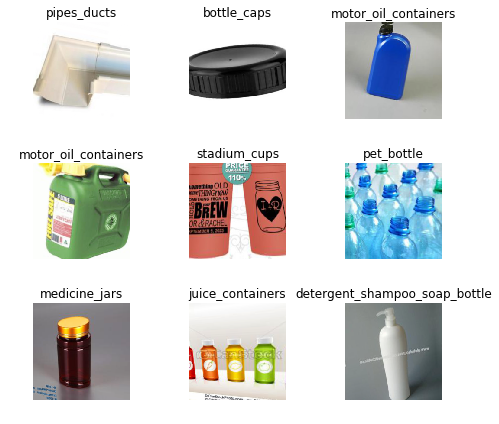

In [5]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
print(data.classes)
len(data.classes),data.c

['baby_bottles', 'bean_bags', 'bottle_caps', 'cling_films', 'combs', 'detergent_shampoo_soap_bottle', 'disposable_coffee_cup', 'disposable_cup_plate', 'exterior_lighting_fixtures', 'eyeglasses', 'flexible_lids', 'grocery_bags', 'jelly_jars', 'juice_containers', 'large_water_bottles', 'margarine_tubs', 'medical_storage_containers', 'medicine_jars', 'milk_jugs', 'motor_oil_containers', 'packing_foam', 'pet_bottle', 'pipes_ducts', 'plastic_cd', 'plastic_cutlery', 'plastic_diapers', 'plastic_food_box', 'prescription_bottle', 'rope', 'sandwidch_bags', 'shoes', 'squeeze_bottles', 'stadium_cups', 'take_out_containers', 'tile', 'tote_bags', 'toys', 'trash_bags', 'tupperware', 'window_frame', 'yogurt_container']


(41, 41)

In [5]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


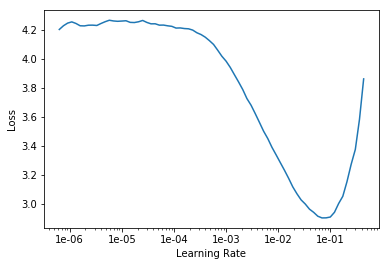

In [9]:
learn.recorder.plot()

In [6]:
learn.fit_one_cycle(10,max_lr=slice(7e-3))

epoch,train_loss,valid_loss,error_rate,time
0,1.995564,0.911749,0.254846,01:27
1,1.215204,0.778199,0.244584,01:16
2,0.934370,0.737539,0.230901,01:16
3,0.763754,0.674925,0.195553,01:15
4,0.614196,0.632403,0.187001,01:16
5,0.496467,0.675292,0.196693,01:16
6,0.387976,0.655288,0.181870,01:16
7,0.311057,0.610573,0.181870,01:16
8,0.239880,0.596407,0.179590,01:16
9,0.206048,0.590164,0.172748,01:16


In [7]:
learn.save('plastic-net-1')

In [8]:
learn.unfreeze()

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


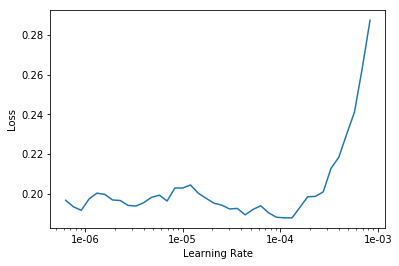

In [10]:
learn.recorder.plot()

In [11]:
learn.fit_one_cycle(10, max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.193947,0.590383,0.173888,01:37
1,0.188139,0.602298,0.171608,01:37
2,0.175330,0.591127,0.169897,01:37
3,0.167542,0.611015,0.173318,01:37
4,0.142691,0.600457,0.167047,01:37
5,0.121111,0.592816,0.163056,01:37
6,0.095959,0.596412,0.159065,01:38
7,0.094757,0.589163,0.161345,01:37
8,0.078560,0.590942,0.157355,01:37
9,0.068827,0.587435,0.153934,01:37


In [12]:
learn.save('plastic-net-2')

In [13]:
interp = ClassificationInterpretation.from_learner(learn)

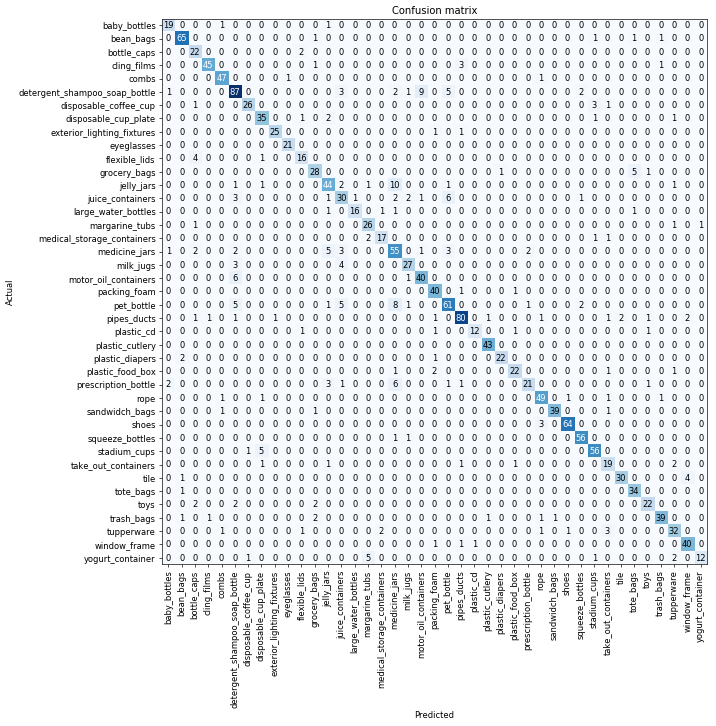

In [14]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [15]:
learn.export()